# Second TP, sur les méthodes de gradient accélérées et les opérateurs proximaux

Ce TP comporte deux exercices : 
- l'**exercice 1** porte sur les méthodes de gradient et gradient accéléré pour des fonctionnelles non uniformément convexes ; 
- l'**exercice 2** porte sur les méthodes de gradient adaptées aux fonctionnelles non régulières. 

Dans la suite, on utilisera le plus possible la librairie Numpy pour la manipulation des vecteurs, matrices, Scipy.stats pour résoudre des problèmes de moindres carrés... et Matplotlib pour la visualisation des résultats. 

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib notebook

# Exercice 1

## Descente de gradient pour une fonctionnelle non uniformément convexe

On rappelle que la méthode de gradient à pas fixe $\alpha$ pour une fonctionnelle $f: \mathbb{R^n} \longrightarrow \mathbb{R}$ consiste en le calcul des itérés :
$$
x_{k+1} = x_k - \alpha \nabla f(x_k), \quad k \in \mathbb{N}
$$
pour un $x_0$ donné.

Un critère d'arrêt classique que la norme $l_2$ du gradient soit inférieure à une tolérance donnée (on limite également le nombre d'itérations total pour éviter les boucles infinies). Un autre critère d'arrêt consiste à tester la norme de la différence entre deux éléments successifs : ces deux critères sont les mêmes au coefficient multiplicatif $\alpha$ près. 

On pourra considérer ici des fonctions de $\mathbb{R}$ dans $\mathbb{R}$ pour simplifier, non uniformément convexes au voisinage de leur minimum : par exemple $f(x) = x^4$, $f(x) = x^8$... L'idée de l'exercice est de vérifier que la convergence est plus lente que pour une fonctionnelle uniformément convexe. À la fin de cet exercice on testera la méthode accélérée de Nesterov, qui s'écrit 
$$
\begin{array}{l}
y_k = x_k + \frac{k-1}{k+2}(x_k - x_{k-1}), \\
x_{k+1} = y_k - \alpha \nabla f(y_k)
\end{array}
$$
pour $k \geq 2$. 

In [2]:
# Définir la fonction f
def f(x):
    #return x**4
    return x**8
    #return x**12
    #return x**2
    #return np.exp(-1./(np.abs(x)))

<IPython.core.display.Javascript object>


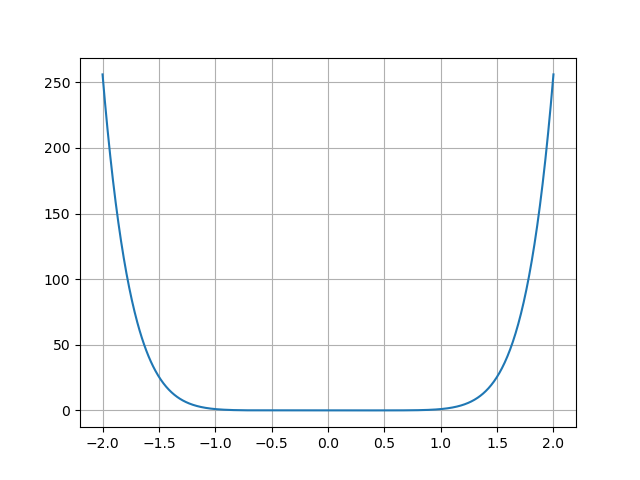

In [3]:
# Représenter la fonction sur l'intervalle [-2,2]
plt.figure()
X = np.linspace(-2,2,1000)
plt.plot(-X,f(-X))
plt.grid()
plt.show()

In [4]:
# Définir le gradient de f
def grad_f(x):
    #return 4*x**3
    return 8*x**7
    #return 12*x**11
    #return 2*x
    #return np.exp(-1./(np.abs(x)))/x/np.sign(x)

<IPython.core.display.Javascript object>


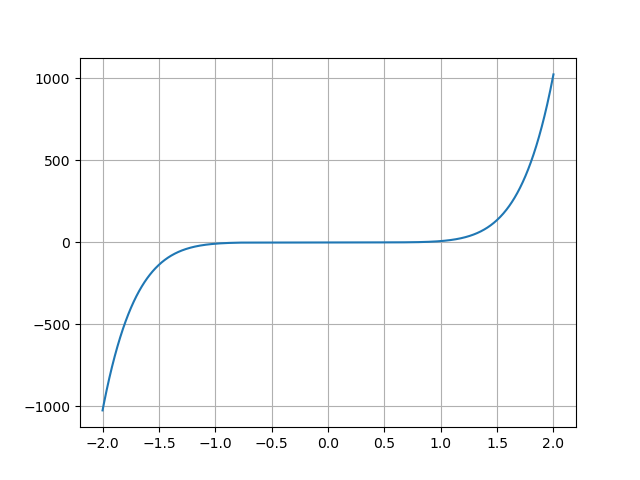

In [5]:
# Représenter le gradient de f sur l'intervalle [-2,2]
plt.figure()
X = np.linspace(-2,2,1000)
plt.plot(-X,grad_f(-X))
plt.grid()
plt.show()

In [8]:
# Mettre en œuvre la méthode du gradient
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [ ]:
# Tester la méthode en partant de x0 = 1 avec une tolérance 10^{⁻14} et un pas 0.2
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [ ]:
# Avec scipy.stats.linregress évaluer numériquement l'ordre de convergence : évaluer le nombre a pour lequel 
# l'erreur est en 1/k^a à l'étape k (asymptotiquement). 
# On pourra évaluer l'erreur |x_k - 0| ou |f(x_k) - f(0)|, au choix. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [18]:
# Représenter, en échelle logarithmique, f(x_k) en fonction de k. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [19]:
# Mettre en œuvre la méthode de gradient accéléré de Nesterov. 

In [27]:
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [28]:
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

# Exercice 2

## Descente de gradient pour une fonctionnelle non régulière

Ici on se propose d'observer le comportement d'algorithmes pour des fonctionnelles non régulières (typiquement lipschitziennes mais pas de classe $\mathcal{C}^1$). \
Dans cet exercice nous allons utiliser l'opérateur proximal pour l'exemple typique d'une telle fonctionnelle : la norme $|| \cdot ||_1$. Rappelons que la méthode de gradient modifiée qui utilise cet opérateur proximal est 
$$
x_{k+1} = prox_{\alpha || \cdot ||_1}(x_k), \quad k \in \mathbb{N}, 
$$ 
où l'opérateur $prox_g$ d'une fonction $g$ est défini par 
$$
prox_{g}(x) = argmin_{y \in \mathbb{R}^d} g(y) + \frac{|| x - y ||_2^2}{2}
$$
pour $g : \mathbb{R}^d \longrightarrow \mathbb{R}$ donnée (en python notre fonction associée sera $prox_{g}(x,\alpha)$ et prendra les deux variables $x$ et $\alpha$). 

**Remarque** Il est important de comprendre en quoi l'algorithme du gradient proximal est un algorithme de gradient implicite. 

Enfin nous allons considérer un problème où il s'agira de minimiser $f(x) = g(x) + \epsilon|| x ||_1$ où $g$ est convexe et régulière et $\epsilon$ est un paramètre de pénalisation devant être positif et petit. Pour cela nous utiliserons l'algorithme de splitting explicite-implicite (« forward-backward ») suivant : 
$$
\begin{array}{l}
x_{k+1/2} = x_k - \alpha \nabla g(x_k), \\
x_{k+1} = prox_{\epsilon \alpha|| \cdot ||_1} (x_{k+1/2})
\end{array}
$$ 
pour $k \in \mathbb{N}$ ($\alpha$ est le pas de la méthode). 

**Remarque** Cet algorithme combine donc deux méthode : une méthode de splitting et une méthode proximale. 

## Question 1

Observer le comportement du gradient à pas fixe, 
du gradient accéléré de Nesterov (pourquoi pas !) puis du gradient à pas variable 1/k
pour la fonctionnelle $|\cdot |$ en dimension 1. 


In [29]:
# Définir la fonction | |, son gradient, et mettre en œuvre les trois 
# algorithmes évoqués ci-dessus (et les tester avec un pas 0,4, une tolérance 10^{-6} et x_0 = \pi. 
# Gradient pour la norme L1, pas régulière... 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

## Question 2
Calculer l'opérateur proximal pour la fonction $\alpha|\cdot |$, pour $\alpha \in \mathbb{R}_+^*$ (dans la suite $\alpha$ sera la pas de la méthode). 

In [30]:
# Opérateur proximal pour (x,alpha) --> alpha |x|. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [31]:
# Représenter l'opérateur proximal, pour alpha = 0,5 par exemple. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

## Question 3
On généralise à la dimension quelconque. On remplace la fonction $|\cdot |$ par la norme $l^1$. On va : 
- définir l'opérateur proximal associé à $\alpha || \cdot ||_1$ ; 
- mettre en œuvre la méthode du gradient modifié utilisant cet opérateur proximal ; 
- vérifier qu'elle fonctionne (mais garder en mémoire qu'on a triché : l'opérateur proximal est calculable seulement dans les cas où le minimum de la fonction est connu !) ; 
- mettre en œuvre la méthode de splitting pour minimiser $x \longmapsto \epsilon || x ||_1 + ||Ax - b||_2^2$ où 
$$
\epsilon > 0 \text{ est petit,}\quad 
A = \left(\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
\end{array}\right)
\quad \text{et} \quad 
b = \left(\begin{array}{c}
1\\
1\\
1
\end{array}\right). 
$$
### Important : réfléchir à ce problème de minimisation et comprendre à quoi il correspond. 

In [32]:
# Définir l'opérateur proximal. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [33]:
# Mettre en œuvre l'algorithme de gradient modifié avec l'opérateur proximal. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [34]:
# Tester ce dernier. 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/

In [35]:
# Définir la fonction h et son gradient (ci-dessous elle est notée mc, pour moindres carrés). 
# Définir la fonction norme l^1 et son gradient. 
# Mettre en œuvre le gradient avec splitting (sans opérateur proximal : il n'y a pas de raison que ça converge). 
# Mettre en œuvre le gradient modifié avec l'opérateur proximal et le splitting. 
# Cette fonction prendra un argument supplémentaire : epsilon. 
# On peut ensuite s'amuser à mettre en œuvre le même algorithme mais accéléré avec la méthode de Nesterov. 
# Tester le tout (avec par exemple eps = 0.01, un pas 0.1...) ! 
# Tester aussi la méthode du gradient pour la fonction h seule (sans la partie singulière). 
# %load http://math.univ-lyon1.fr/homes-www/lagoutiere/Enseignement/M2_SMSD/TP_2/